In [1]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Maximum:  ', round(torch.cuda.max_memory_reserved(0)/1e+6,3), 'GB')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1e+6,3), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1e+6,3), 'GB')

NVIDIA GeForce GTX 960
Memory Usage:
Maximum:   0.0 GB
Allocated: 0.0 GB
Cached:    0.0 GB


In [4]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


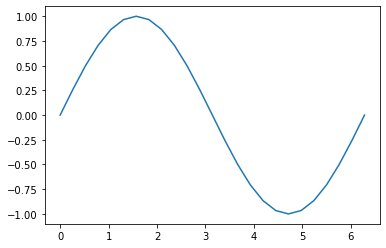

In [5]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [6]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [7]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [8]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [9]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x000002262FF24A60>, 0), (None, 0))
((<SinBackward0 object at 0x000002262FF247C0>, 0), (None, 0))
((<AccumulateGrad object at 0x000002262FF24B20>, 0),)
()

c:

b:

a:
None


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


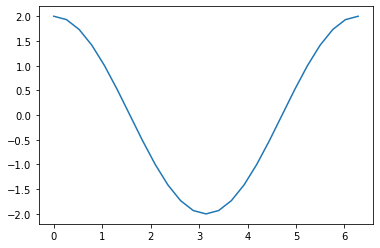

In [10]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [11]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()
        
        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x
    
some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

In [12]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([ 0.0829, -0.0789,  0.0133,  0.0918,  0.0228, -0.0789, -0.0930, -0.0669,
         0.0178, -0.0144], grad_fn=<SliceBackward0>)
None


In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(157.6954, grad_fn=<SumBackward0>)


In [14]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([ 0.0829, -0.0789,  0.0133,  0.0918,  0.0228, -0.0789, -0.0930, -0.0669,
         0.0178, -0.0144], grad_fn=<SliceBackward0>)
tensor([-1.3614, -0.2419, -2.1239,  6.8804,  3.6127,  3.3511,  5.8690, -3.0119,
        -0.6156,  3.1141])


In [ ]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

In [15]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()
    
print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

tensor([-1.3614, -0.2419, -2.1239,  6.8804,  3.6127,  3.3511,  5.8690, -3.0119,
        -0.6156,  3.1141])
tensor([ -8.1686,  -1.4512, -12.7437,  41.2823,  21.6761,  20.1063,  35.2142,
        -18.0714,  -3.6939,  18.6846])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [16]:
# Turning Autograd Off and On
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [18]:
#numpy wont work with Autograd. 
x = torch.rand(5, requires_grad=True)
y = x.detach() # get non-Autograd copy

print(x)
print(y)

tensor([0.7444, 0.0112, 0.9680, 0.3988, 0.5464], requires_grad=True)
tensor([0.7444, 0.0112, 0.9680, 0.3988, 0.5464])


In [19]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y
        
print(prf.key_averages().table(sort_by='self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        99.53%        1.535s        99.53%        1.535s       1.535ms       1.011ms        50.27%       1.011ms       1.011us          1000  
    aten::mul         0.47%       7.172ms         0.47%       7.172ms       7.172us       1.000ms        49.73%       1.000ms       1.000us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 1.542s
Self CUDA time total: 2.011ms

